**Importing the necessary libraries**

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA

#### Step-0 Data collection

#### Here we are loading the dataset, diplay the data and summary of the dataset

In [277]:
data=pd.read_csv("/content/mcdonalds.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


* We have a total of 1453 records/rows & 15 features/columns

* **Basic Checks of Dataset**

In [278]:
data.shape

(1453, 15)

In [279]:
print("First five rows of Dataset:")
display(data.head())

print("Last five rows of Dataset:")
data.tail()

First five rows of Dataset:


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


Last five rows of Dataset:


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [280]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

#### Here we are seeing the columns and its datatype

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


The Like column likely contains strings such as "I hate it!-5","I love it!+5"'+3', '0', '-2', etc. To convert these safely:




In [282]:
def convert_like(value):
    if isinstance(value, str):
        if "I hate it!-5" in value:
            return -5
        elif "I love it!+5" in value:
            return 5
        else:
            try:
                return int(value)
            except:
                return None
    else:
        return value  # Already numeric

# Apply to the column and assign back
data['Like'] = data['Like'].apply(convert_like)


In [283]:
data['Like']

,Like
0,-3
1,2
2,1
3,4
4,2
...,...
1448,-5
1449,2
1450,3
1451,4


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(2), object(13)
memory usage: 170.4+ KB


#### Here we are checking do we have have null values

In [285]:
data.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


#### step 1 Data Validation

In [286]:
df=data.copy()

In [287]:
# As python is case sensitive , converting object data type columns into lower cases

for col in df.columns:
    if df[col].dtype=='object':
        df[col] = df[col].str.lower()

In [288]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,no,yes,no,yes,no,yes,yes,no,yes,no,no,-3,61,every three months,female
1,yes,yes,no,yes,yes,yes,yes,yes,yes,no,no,2,51,every three months,female
2,no,yes,yes,yes,yes,yes,no,yes,yes,yes,no,1,62,every three months,female
3,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,4,69,once a week,female
4,no,yes,no,yes,yes,yes,yes,no,no,yes,no,2,49,once a month,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,no,yes,no,yes,yes,no,no,no,yes,no,yes,-5,47,once a year,male
1449,yes,yes,no,yes,no,no,yes,yes,no,yes,no,2,36,once a week,female
1450,yes,yes,no,yes,no,yes,no,yes,yes,no,no,3,52,once a month,female
1451,yes,yes,no,no,no,yes,yes,yes,no,yes,no,4,41,every three months,male


In [289]:
# Duplicated rows check

df[df.duplicated()]

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
404,yes,yes,no,no,no,yes,yes,yes,no,yes,no,5,50,once a week,female
421,yes,yes,no,yes,yes,yes,no,yes,yes,no,no,3,25,once a month,male
441,no,yes,no,yes,no,yes,yes,no,no,no,no,2,62,every three months,female
453,yes,yes,no,yes,no,yes,no,yes,yes,no,no,2,43,every three months,female
598,no,yes,no,yes,yes,yes,yes,no,no,no,yes,-5,59,never,female
674,yes,yes,no,yes,yes,yes,yes,yes,no,no,no,5,26,more than once a week,female
710,yes,yes,no,yes,no,yes,yes,yes,no,no,no,4,49,once a week,female
725,no,yes,no,yes,yes,yes,yes,no,no,no,no,0,42,once a month,female
741,yes,yes,no,yes,yes,yes,yes,yes,no,no,no,2,21,every three months,female
744,yes,yes,no,yes,yes,yes,yes,yes,no,no,no,5,18,once a week,female


In [290]:
display(df[df.duplicated()])
print(f"Number of Rows Duplicated: {len(df[df.duplicated()])}")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
404,yes,yes,no,no,no,yes,yes,yes,no,yes,no,5,50,once a week,female
421,yes,yes,no,yes,yes,yes,no,yes,yes,no,no,3,25,once a month,male
441,no,yes,no,yes,no,yes,yes,no,no,no,no,2,62,every three months,female
453,yes,yes,no,yes,no,yes,no,yes,yes,no,no,2,43,every three months,female
598,no,yes,no,yes,yes,yes,yes,no,no,no,yes,-5,59,never,female
674,yes,yes,no,yes,yes,yes,yes,yes,no,no,no,5,26,more than once a week,female
710,yes,yes,no,yes,no,yes,yes,yes,no,no,no,4,49,once a week,female
725,no,yes,no,yes,yes,yes,yes,no,no,no,no,0,42,once a month,female
741,yes,yes,no,yes,yes,yes,yes,yes,no,no,no,2,21,every three months,female
744,yes,yes,no,yes,yes,yes,yes,yes,no,no,no,5,18,once a week,female


Number of Rows Duplicated: 22


**From a Business Point of View:**

 Keep Duplicate Rows

Why?

Each response represents a customer’s voice, even if their answers match others.

Business decisions (like improving food taste, service speed, etc.) benefit from knowing how often certain feedback appears.

* **Validation each & every column data**
    * using **unique** method in pandas dataframe

In [291]:
# Iterate over the columns to check for object type and count unique values
for column in df.columns:
    print(f"Number of Unique Classes in Column '{column}':", df[column].nunique())
    print(df[column].value_counts())
    print()
    print("Unique Classes:")
    df[column].unique()

Number of Unique Classes in Column 'yummy': 2
yummy
yes    803
no     650
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'convenient': 2
convenient
yes    1319
no      134
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'spicy': 2
spicy
no     1317
yes     136
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'fattening': 2
fattening
yes    1260
no      193
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'greasy': 2
greasy
yes    765
no     688
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'fast': 2
fast
yes    1308
no      145
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'cheap': 2
cheap
yes    870
no     583
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'tasty': 2
tasty
yes    936
no     517
Name: count, dtype: int64

Unique Classes:
Number of Unique Classes in Column 'ex

### 2. EDA (Data Understanding)<a id=eda>
    


* In EDA we can do Data Analysis in two methods
    - Uni-Variate Analysis (Study of Individual column Data)
        - Descriptive + Visual Analysis
    - Bi-Varaite Analysis (Study data between two columns)
        - Descriptive + Visual Analysis
    - Multi-Variate Analysis (Study data between three or more columns)
        - Descriptive Stats

In [292]:
df.describe()

,Like,Age
count,1453.000000,1453.000000
mean,0.777013,44.604955
std,3.116842,14.221178
min,-5.000000,18.000000
25%,-1.000000,33.000000
50%,1.000000,45.000000
75%,3.000000,57.000000
max,5.000000,71.000000


Selects the first 11 columns, which contain opinions like "yummy", "fast", etc.

Converts "yes" to 1 and "no" to 0.

These binary values are needed for PCA.

In [293]:
segmentation_columns = df.columns[:11]
MD_x = df[segmentation_columns].apply(lambda x: x == 'yes').astype(int)

PCA requires numeric input. Here, you're converting 'yes'/'no' into binary (1/0).

This matrix becomes the base for dimensionality reduction.

Original data has 11 dimensions (one for each feature). PCA reduces it to 2, making it easy to:



In [294]:
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

In [295]:
MD_pca

array([[-0.42536706,  0.21907878],
       [ 0.21863768, -0.38818996],
       [-0.37541475, -0.73043507],
       ...,
       [ 0.18589445, -1.06266156],
       [ 1.18206441,  0.03856977],
       [-1.55024186, -0.27503101]])

Shows how each original feature contributes to the principal components.

Arrows help interpret feature importance & direction of variance.

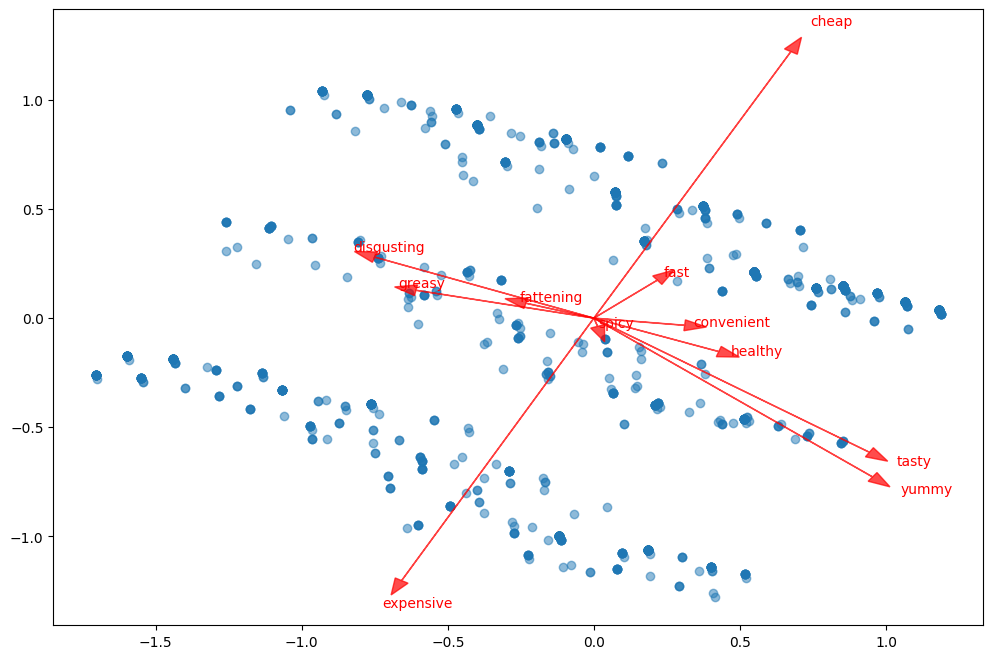

In [296]:
plt.figure(figsize=(12, 8))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], alpha=0.5)

loadings = pca.components_.T
for i, feature in enumerate(segmentation_columns):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
              color='red', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, feature, color='red')


Quantitative understanding of how strongly each original variable loads onto the two components.


PCA Loadings:
              PC1    PC2
yummy       0.477 -0.364
convenient  0.155 -0.016
spicy       0.006 -0.019
fattening  -0.116  0.034
greasy     -0.304  0.064
fast        0.108  0.087
cheap       0.337  0.611
tasty       0.472 -0.307
expensive  -0.329 -0.601
healthy     0.214 -0.077
disgusting -0.375  0.140


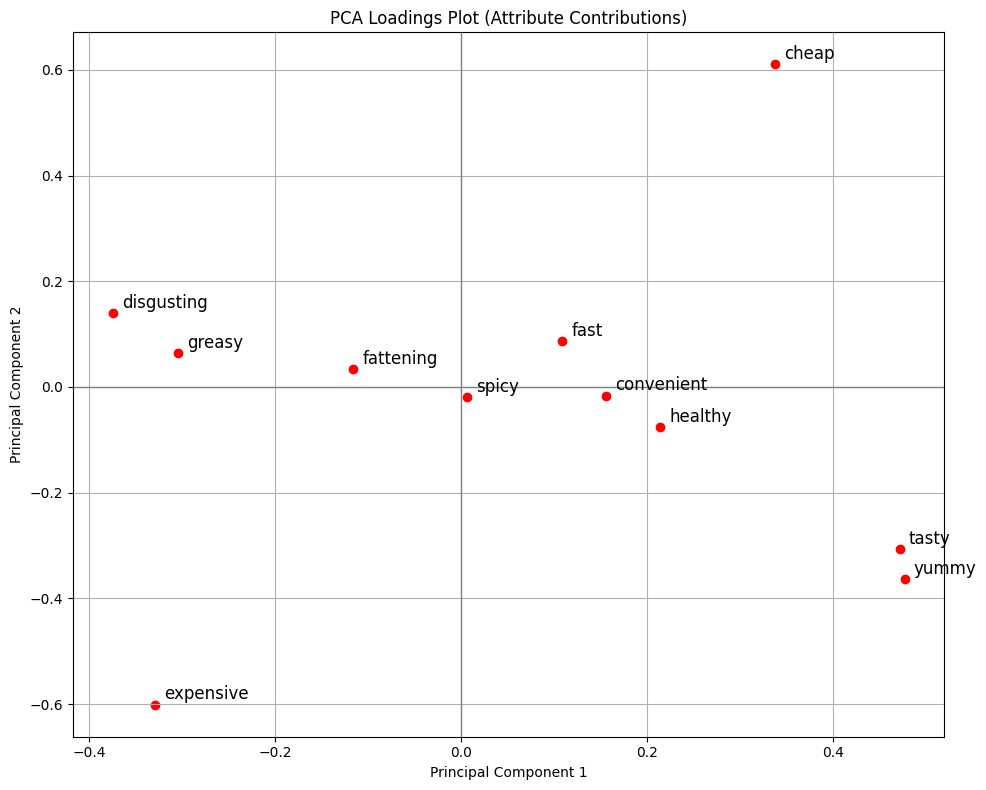

In [297]:
# Loadings (how much each variable contributes to PC1 and PC2)
loadings_df = pd.DataFrame(
    pca.components_.T,
    index=segmentation_columns,
    columns=['PC1', 'PC2']
)

# Print loadings table
print("\nPCA Loadings:")
print(loadings_df.round(3))

# Visualize the loadings as a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'], color='red')

# Annotate each point with variable name
for i, variable in enumerate(loadings_df.index):
    plt.text(loadings_df.PC1[i] + 0.01, loadings_df.PC2[i] + 0.01, variable, fontsize=12)

plt.title('PCA Loadings Plot (Attribute Contributions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)
plt.tight_layout()
plt.show()


KMeans works better in reduced-dimensional spaces.

Clustering users based on their food experience perceptions (using just 2 PCs helps improve efficiency and reduce noise).


Cluster Sizes:
Cluster
1    897
0    556
Name: count, dtype: int64


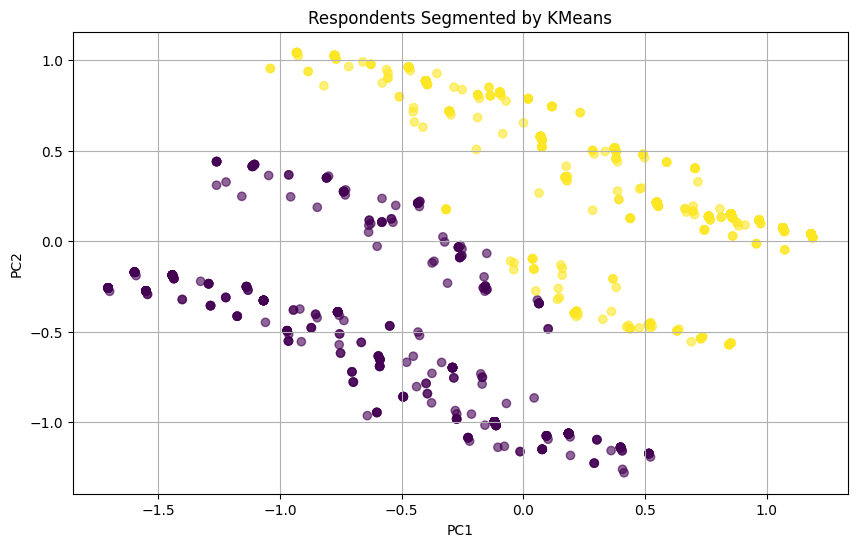

In [298]:
from sklearn.cluster import KMeans

# Fit KMeans on the PCA result
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(MD_pca)

# Add cluster info to original DataFrame (optional)
df['Cluster'] = clusters

# Show count of each cluster
print("\nCluster Sizes:")
print(df['Cluster'].value_counts())

# Optional: visualize clusters (comment out if not needed)
plt.figure(figsize=(10, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Respondents Segmented by KMeans')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Categorical Variables: Frequency Count & Bar Plots
Example: How many customers answered "yes" or "no" to each food feature?


Column: yummy
yummy
yes    803
no     650
Name: count, dtype: int64


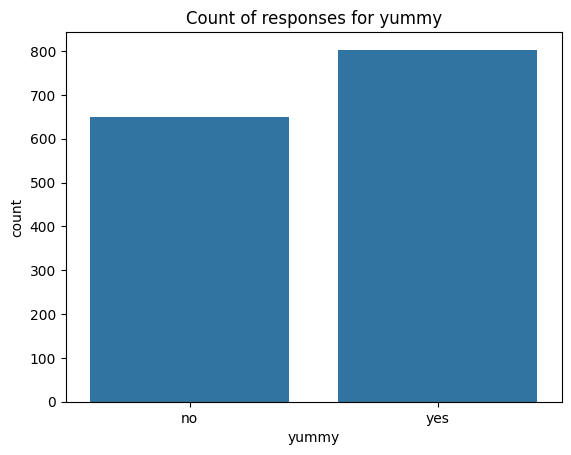


Column: convenient
convenient
yes    1319
no      134
Name: count, dtype: int64


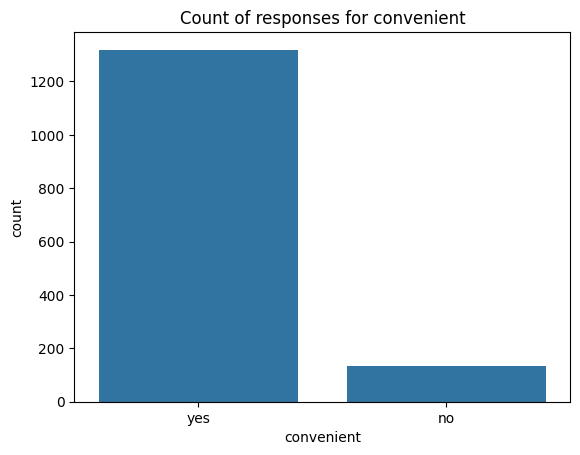


Column: spicy
spicy
no     1317
yes     136
Name: count, dtype: int64


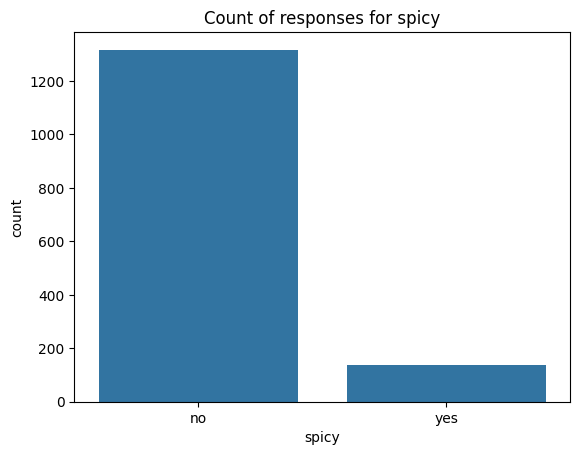


Column: fattening
fattening
yes    1260
no      193
Name: count, dtype: int64


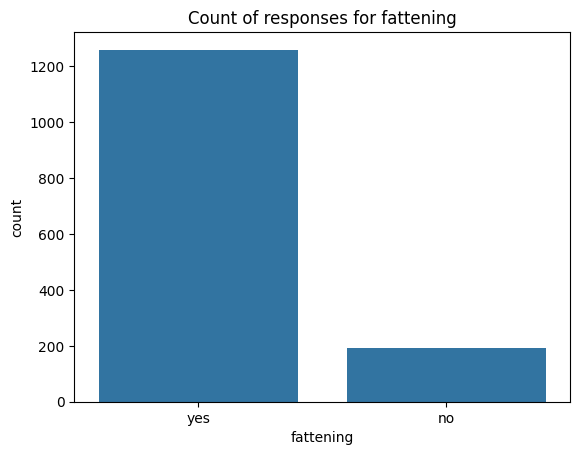


Column: greasy
greasy
yes    765
no     688
Name: count, dtype: int64


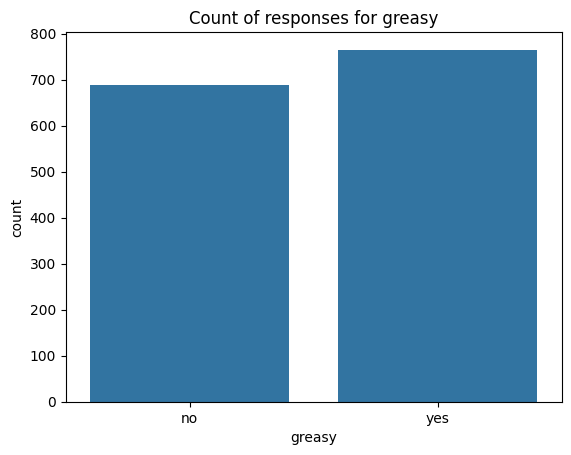


Column: fast
fast
yes    1308
no      145
Name: count, dtype: int64


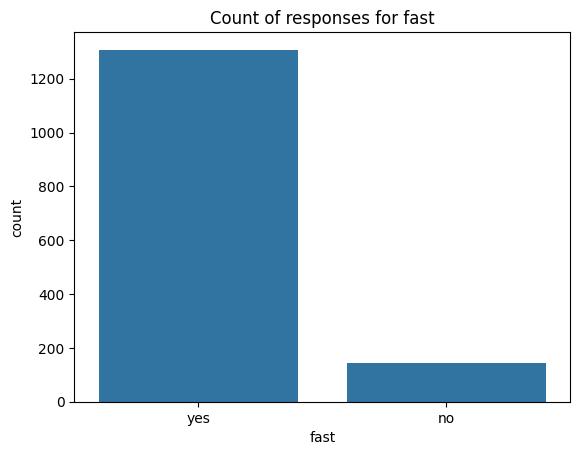


Column: cheap
cheap
yes    870
no     583
Name: count, dtype: int64


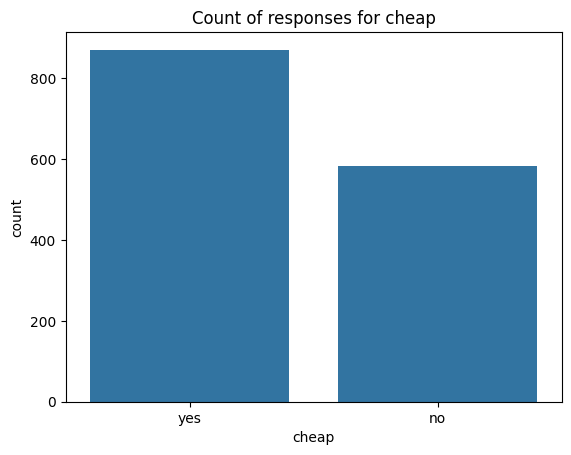


Column: tasty
tasty
yes    936
no     517
Name: count, dtype: int64


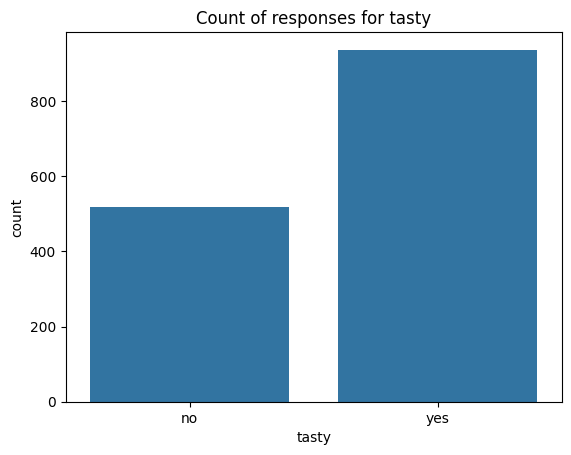


Column: expensive
expensive
no     933
yes    520
Name: count, dtype: int64


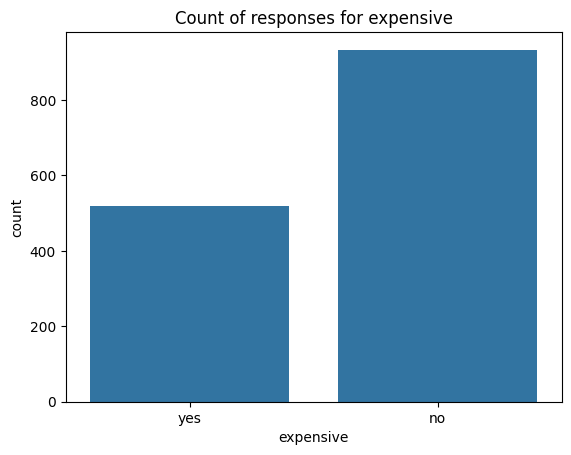


Column: healthy
healthy
no     1164
yes     289
Name: count, dtype: int64


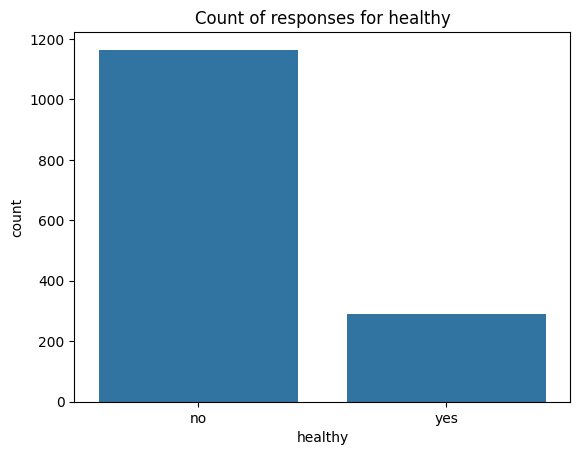


Column: disgusting
disgusting
no     1100
yes     353
Name: count, dtype: int64


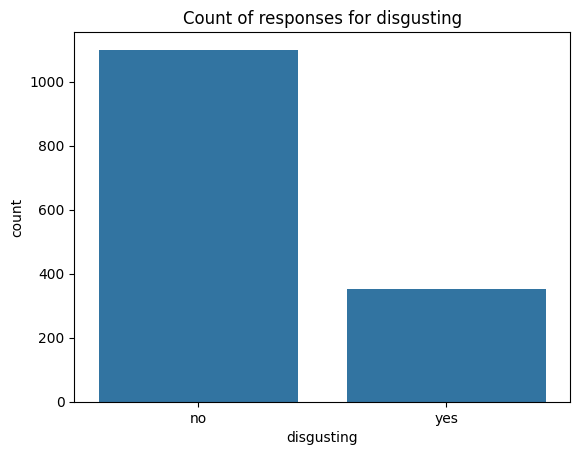

In [299]:
for col in segmentation_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    sns.countplot(x=df[col])
    plt.title(f'Count of responses for {col}')
    plt.show()


Helps you understand customer sentiment spread.

count    1453.000000
mean        0.777013
std         3.116842
min        -5.000000
25%        -1.000000
50%         1.000000
75%         3.000000
max         5.000000
Name: Like, dtype: float64


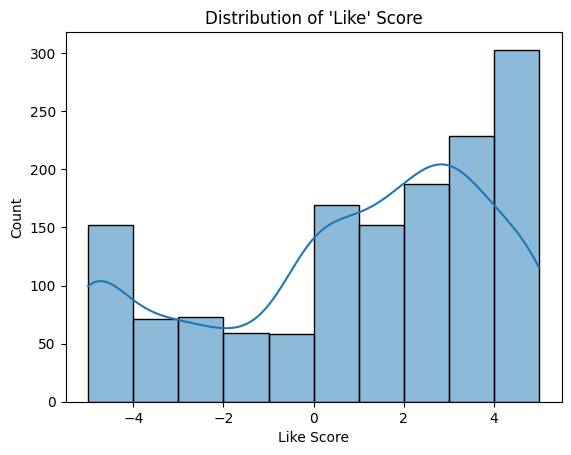

In [300]:
print(df['Like'].describe())
sns.histplot(df['Like'], bins=10, kde=True)
plt.title("Distribution of 'Like' Score")
plt.xlabel("Like Score")
plt.ylabel("Count")
plt.show()

**Bi-Variate Analysis**

Like Score vs Binary Variables

See if liking increases/decreases when customers say “yes” to a feature like tasty, fast, etc.

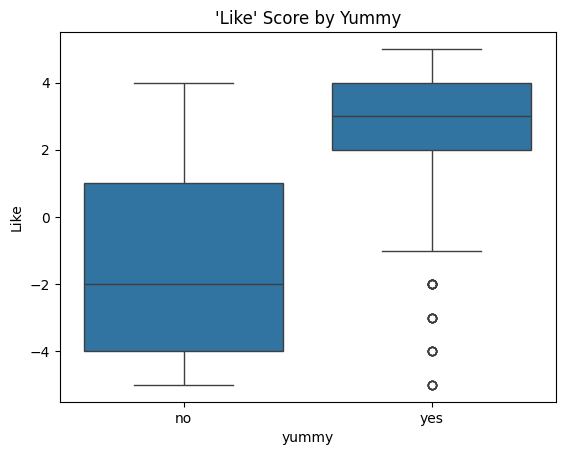

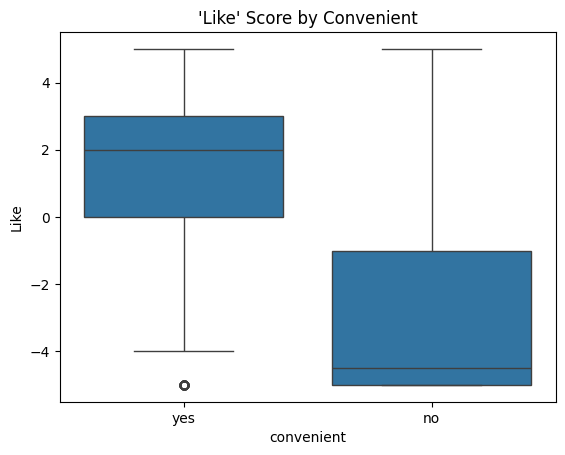

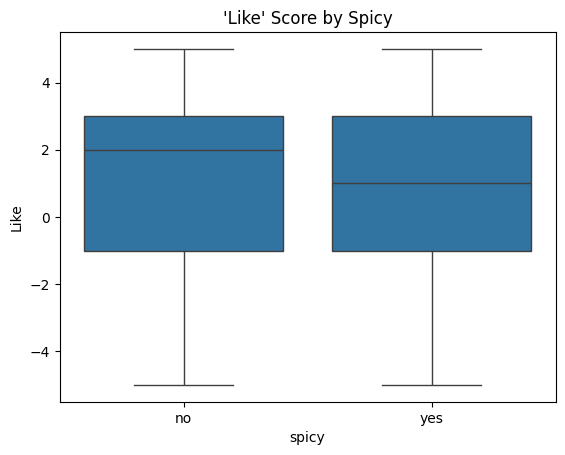

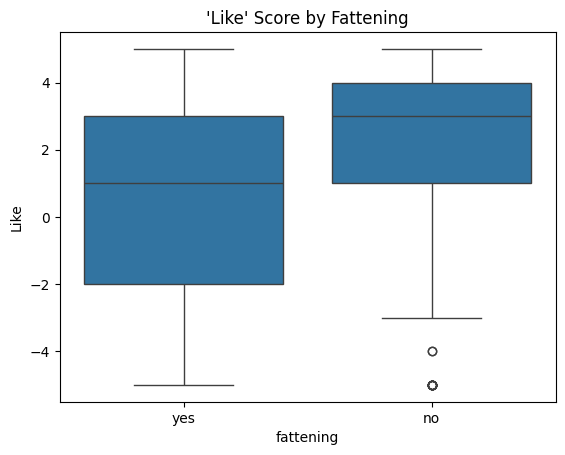

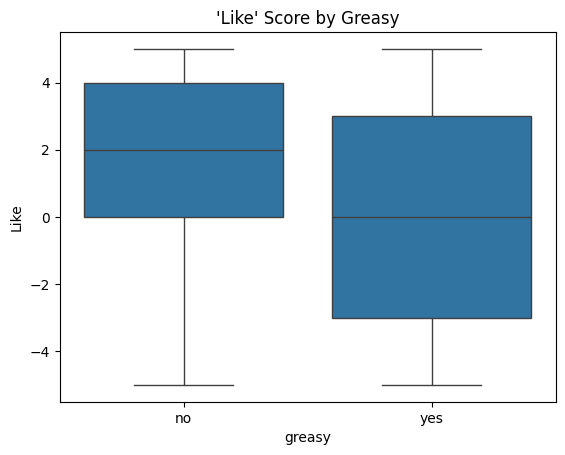

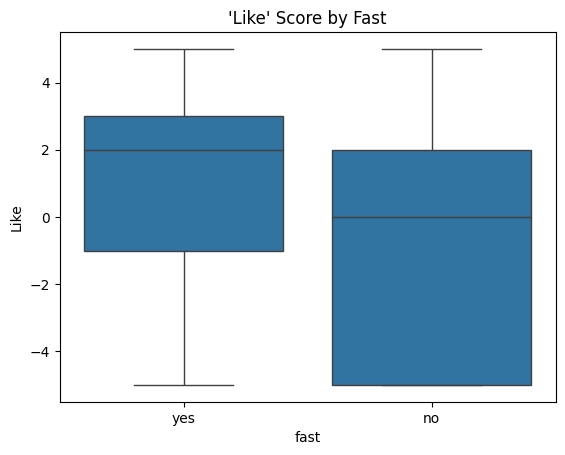

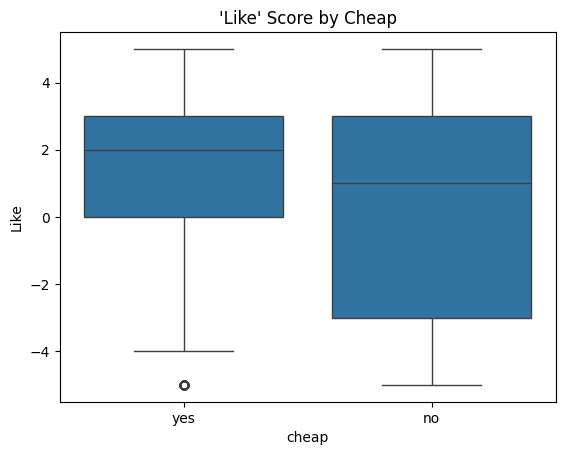

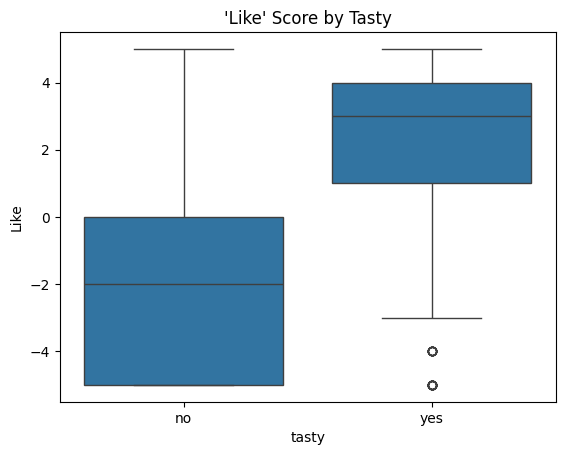

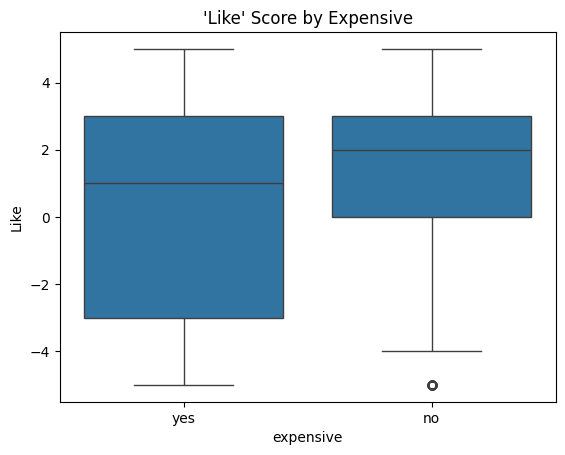

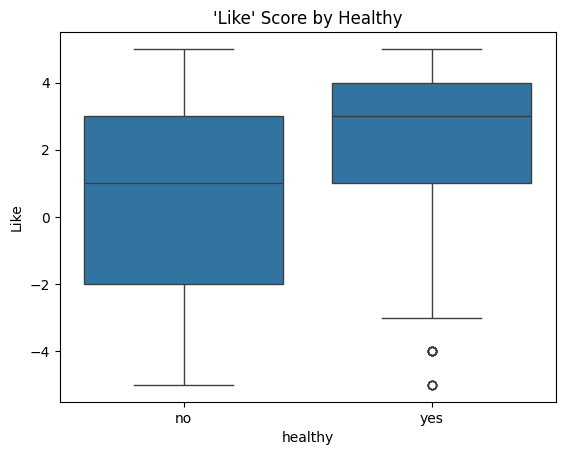

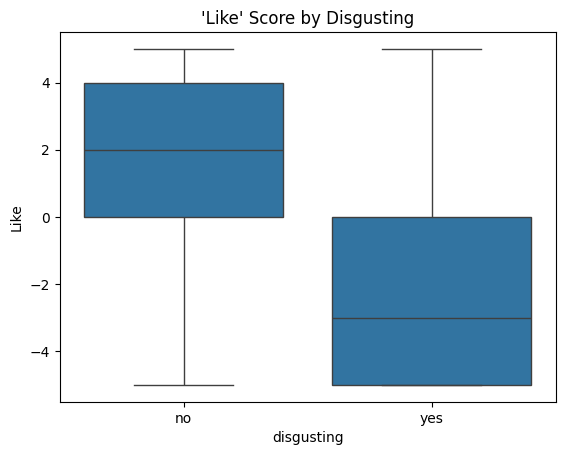

In [301]:
for col in segmentation_columns:
    sns.boxplot(x=df[col], y=df['Like'])
    plt.title(f"'Like' Score by {col.title()}")
    plt.show()

Correlation Heatmap (Numerical columns)

Helps identify which features are most closely related to each other and to the sentiment score.



In [302]:
segmentation_columns = [
    'yummy', 'convenient', 'spicy', 'fattening',
    'greasy', 'fast', 'cheap', 'tasty',
    'expensive', 'healthy', 'disgusting'
]


This shows how each food attribute (yes/no) correlates with customer "Like" score. For example:

tasty might have a high positive correlation

fattening or disgusting may have negative correlations

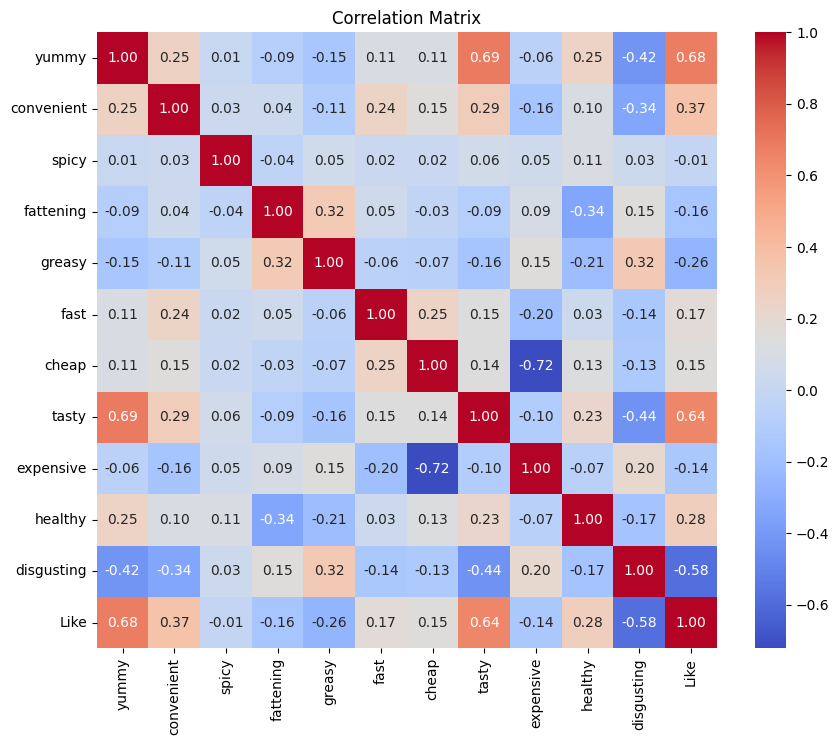

In [303]:
# Convert 'yes'/'no' to binary for correlation
binary_df = df[segmentation_columns].apply(lambda x: x == 'yes').astype(int)

# Add numeric 'Like' column
binary_df['Like'] = df['Like']

# Now compute correlation matrix
correlation_matrix = binary_df.corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [304]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,no,yes,no,yes,no,yes,yes,no,yes,no,no,-3,61,every three months,female,0
1,yes,yes,no,yes,yes,yes,yes,yes,yes,no,no,2,51,every three months,female,1
2,no,yes,yes,yes,yes,yes,no,yes,yes,yes,no,1,62,every three months,female,0
3,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,4,69,once a week,female,1
4,no,yes,no,yes,yes,yes,yes,no,no,yes,no,2,49,once a month,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,no,yes,no,yes,yes,no,no,no,yes,no,yes,-5,47,once a year,male,0
1449,yes,yes,no,yes,no,no,yes,yes,no,yes,no,2,36,once a week,female,1
1450,yes,yes,no,yes,no,yes,no,yes,yes,no,no,3,52,once a month,female,0
1451,yes,yes,no,no,no,yes,yes,yes,no,yes,no,4,41,every three months,male,1


When performing PCA and segmentation, we focus only on the 11 opinion attributes:

In [305]:
# Identifying outliers by using IQR
data = df.select_dtypes(include='number')  # Select only numerical columns

for d in data.columns:
    Q1 = data[d].quantile(0.25)
    Q3 = data[d].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[d] < lower_bound) | (data[d] > upper_bound)][[d]]
    if not outliers.empty:
        print(d)


visualization of outliers


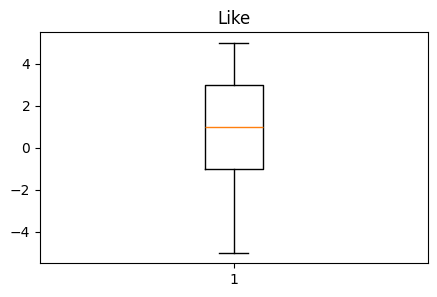

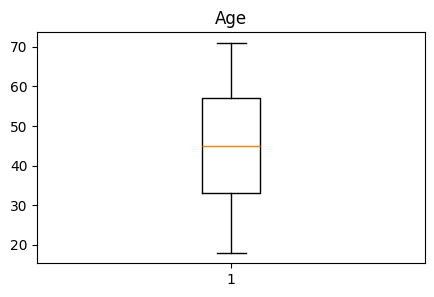

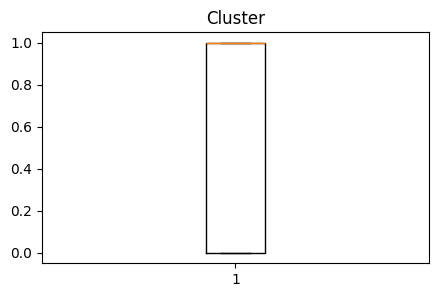

In [306]:
# visualization of outliers
print('visualization of outliers')
for d in data.columns:
    plt.figure(figsize=(5,3))
    plt.boxplot(data[d])
    plt.title(d)
    plt.show()

**Feature Engineering (selecting proper x data for modeling)**
   

In [307]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,no,yes,no,yes,no,yes,yes,no,yes,no,no,-3,61,every three months,female,0
1,yes,yes,no,yes,yes,yes,yes,yes,yes,no,no,2,51,every three months,female,1
2,no,yes,yes,yes,yes,yes,no,yes,yes,yes,no,1,62,every three months,female,0
3,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,4,69,once a week,female,1
4,no,yes,no,yes,yes,yes,yes,no,no,yes,no,2,49,once a month,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,no,yes,no,yes,yes,no,no,no,yes,no,yes,-5,47,once a year,male,0
1449,yes,yes,no,yes,no,no,yes,yes,no,yes,no,2,36,once a week,female,1
1450,yes,yes,no,yes,no,yes,no,yes,yes,no,no,3,52,once a month,female,0
1451,yes,yes,no,no,no,yes,yes,yes,no,yes,no,4,41,every three months,male,1


You likely created the Cluster column using unsupervised learning (e.g., KMeans or PCA + KMeans), where the algorithm groups customers into clusters based on similarity in opinion-based features (like yummy, cheap, fast, etc.).

That column is useful for segmentation, not prediction.

1. Cluster is Not a True Feature
Cluster is an artificial label created from other features (yummy, cheap, etc.)

Including it introduces data leakage, because:

It already encodes much of the information the model should learn independently

It overlaps with your input features

In [308]:
df.drop(['Cluster'],axis=1, inplace=True)

In [309]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

   **Feature Modification**

The column has only two unique values: male and female.

we can safely convert them into 0 and 1

In [310]:
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

'VisitFrequency' has inherent order → "once a week" means more frequent than "once a month"

That order contains important predictive information

Ordinal Encoding assigns increasing integers based on frequency:

In [311]:
df['VisitFrequency'].value_counts()

,count
VisitFrequency,
once a month,439
every three months,342
once a year,252
once a week,235
never,131
more than once a week,54


In [312]:
# First, standardize to lowercase for consistency
df['VisitFrequency'] = df['VisitFrequency'].str.lower()

# Then apply the mapping
visit_map = {
    'never': 0,
    'once a year': 1,
    'every three months': 2,
    'once a month': 3,
    'once a week': 4,
    'more than once a week': 5
}

df['VisitFrequency'] = df['VisitFrequency'].map(visit_map)


In [313]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,no,yes,no,yes,no,yes,yes,no,yes,no,no,-3,61,2,1
1,yes,yes,no,yes,yes,yes,yes,yes,yes,no,no,2,51,2,1
2,no,yes,yes,yes,yes,yes,no,yes,yes,yes,no,1,62,2,1
3,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,4,69,4,1
4,no,yes,no,yes,yes,yes,yes,no,no,yes,no,2,49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,no,yes,no,yes,yes,no,no,no,yes,no,yes,-5,47,1,0
1449,yes,yes,no,yes,no,no,yes,yes,no,yes,no,2,36,4,1
1450,yes,yes,no,yes,no,yes,no,yes,yes,no,no,3,52,3,1
1451,yes,yes,no,no,no,yes,yes,yes,no,yes,no,4,41,2,0


In [314]:
binary_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

df[binary_columns] = df[binary_columns].apply(lambda x: x.str.lower() == 'yes').astype(int)


In [315]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,1,0
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,1
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,2,0


* Scaler Suggested if columns data is on different scales
    - Standard Scaler (-3 to +3)
    - Robust Scaler (When we have outliers in columns)
    - MinMaxScaler (-1 to +1)

In [316]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

Do NOT apply MinMaxScaler to the target column in supervised learning (regression/classification).

In [317]:
df.iloc[:,[12,13]]=scaler.fit_transform(df.iloc[:,[12,13]])

In [318]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,0.811321,0.4,1
1,1,1,0,1,1,1,1,1,1,0,0,2,0.622642,0.4,1
2,0,1,1,1,1,1,0,1,1,1,0,1,0.830189,0.4,1
3,1,1,0,1,1,1,1,1,0,0,1,4,0.962264,0.8,1
4,0,1,0,1,1,1,1,0,0,1,0,2,0.584906,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,0.547170,0.2,0
1449,1,1,0,1,0,0,1,1,0,1,0,2,0.339623,0.8,1
1450,1,1,0,1,0,1,0,1,1,0,0,3,0.641509,0.6,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,0.433962,0.4,0


In [320]:
df['Age']=df['Age'].round(1)

In [321]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,0.8,0.4,1
1,1,1,0,1,1,1,1,1,1,0,0,2,0.6,0.4,1
2,0,1,1,1,1,1,0,1,1,1,0,1,0.8,0.4,1
3,1,1,0,1,1,1,1,1,0,0,1,4,1.0,0.8,1
4,0,1,0,1,1,1,1,0,0,1,0,2,0.6,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,0.5,0.2,0
1449,1,1,0,1,0,0,1,1,0,1,0,2,0.3,0.8,1
1450,1,1,0,1,0,1,0,1,1,0,0,3,0.6,0.6,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,0.4,0.4,0


* For this we dataset we want to predict Class Genre, taking **Class column as Output (y)**
    - **Remaining Columns data can be taken as input (X)**

In [322]:
X=df.drop('Like',axis=1)
y=df['Like']

In [323]:
X.shape , y.shape

((1453, 14), (1453,))

In [324]:
print("Input Columns Data (X):")
display(X.head())
print()
print("Output Column Data (y):")
display(y.head())

Input Columns Data (X):


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0.8,0.4,1
1,1,1,0,1,1,1,1,1,1,0,0,0.6,0.4,1
2,0,1,1,1,1,1,0,1,1,1,0,0.8,0.4,1
3,1,1,0,1,1,1,1,1,0,0,1,1.0,0.8,1
4,0,1,0,1,1,1,1,0,0,1,0,0.6,0.6,0



Output Column Data (y):


,Like
0,-3
1,2
2,1
3,4
4,2


train_test_split of X and y

    - train part used for model building
    - test part is used for model evaluation

In [327]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [328]:
len(X_train), len(y_train)

(1162, 1162)

In [329]:
print(X_train)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
1061      0           1      0          1       1     1      0      0   
1142      1           1      0          1       0     1      0      0   
793       1           1      0          1       1     1      1      1   
724       1           1      0          1       1     1      1      1   
374       1           1      0          1       1     1      0      1   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1095      1           1      0          0       0     1      0      1   
1130      1           1      0          1       1     1      1      1   
1294      0           1      0          1       1     1      1      0   
860       1           1      0          1       0     1      1      1   
1126      0           0      0          1       1     1      0      0   

      expensive  healthy  disgusting  Age  VisitFrequency  Gender  
1061          1        0           1  0.6             0

In [330]:
len(X_test),len(y_test)

(291, 291)

Linear models

We have output data numeric, considering regression algorithms

Regression Models/Algorithms:

Linear Algorithms (when the data is linear to output (having correlation))

1.Linear Regression

2.Polynomial Regression

3.Lasso & Ridge Regression

Non-Linear Algorithms (when the data is non-linear to output (not having correlation) using classification algorithms)

1.RandomForest Regressor

2.Xgboost Regressor

3.Support Vector Regressor
  etc..
  






In [331]:
# Algorithm Modules

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

 Modeling - Defining & Training

In [332]:
# Multiple Linear Regression
mlr = LinearRegression()
# Polynomial Regression
polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam
poly = LinearRegression()
# Lasso (L1) & Ridge (L2)
lasso = Lasso(alpha = 5) # alpha - hyperparam - penalty
ridge = Ridge(alpha = 5)
# Random Forest regressor
rf = RandomForestRegressor(n_estimators=50) # n_estimators - hyperparam - number of decision trees
# Support Vector Regressor
svr = SVR(kernel='rbf') # non-linear kernel for non-linear data
# Xgb
xgb = XGBRegressor()
# KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5) # default k_value 5:
# DecisionTreeRegressor
dt = DecisionTreeRegressor()


**Training**

Using xtrain, ytrain data
Using fit method to train the defined model with xtrain, ytrain


**Linear regression**

In [333]:
# Model Training

mlr.fit(X_train, y_train)

LinearRegression()

In [334]:

mlr.coef_, mlr.intercept_

(array([ 1.5916785 ,  0.33050369, -0.18438159, -0.26894094, -0.24049334,
         0.46906398, -0.08362762,  1.11550197, -0.29830989,  0.46447057,
        -1.50494535, -0.64380342,  3.97538213,  0.09780656]),
 np.float64(-2.332427311234599))

In [335]:
# converting x data to poly features

x_train_poly = polyfeat.fit_transform(X_train)

x_test_poly = polyfeat.transform(X_test)

In [336]:
x_train_poly.shape, x_test_poly.shape

((1162, 120), (291, 120))

In [337]:
# Model Training

poly.fit(X_train, y_train)

LinearRegression()

In [338]:
# params

poly.coef_, poly.intercept_

(array([ 1.5916785 ,  0.33050369, -0.18438159, -0.26894094, -0.24049334,
         0.46906398, -0.08362762,  1.11550197, -0.29830989,  0.46447057,
        -1.50494535, -0.64380342,  3.97538213,  0.09780656]),
 np.float64(-2.332427311234599))

**Lasso and Ridge**

In [339]:
# Model Training

lasso.fit(X_train,y_train), ridge.fit(X_train,y_train)

(Lasso(alpha=5), Ridge(alpha=5))

In [340]:
# Model params

lasso.intercept_, lasso.coef_

(np.float64(0.8605851979345955),
 array([ 0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,
         0.]))

In [341]:
ridge.intercept_, ridge.coef_

(np.float64(-2.205765788276011),
 array([ 1.60949952,  0.37599971, -0.17869304, -0.27833379, -0.25715367,
         0.4399285 , -0.05728409,  1.14474401, -0.27137703,  0.46314695,
        -1.51205301, -0.68099863,  3.65237586,  0.09179191]))


**Randomforest Regressor**

In [342]:
# Model Train

rf.fit(X_train, y_train)

# n_estimators is the number of trees hyperparam

RandomForestRegressor(n_estimators=50)

In [343]:
# Model Params

print("Model Params:")
print(rf.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(rf.feature_names_in_, rf.feature_importances_):
    print(i+": "+str(round(j,2)))

Model Params:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Columns Importance:

yummy: 0.46
convenient: 0.01
spicy: 0.02
fattening: 0.01
greasy: 0.02
fast: 0.02
cheap: 0.02
tasty: 0.04
expensive: 0.02
healthy: 0.02
disgusting: 0.11
Age: 0.1
VisitFrequency: 0.13
Gender: 0.03


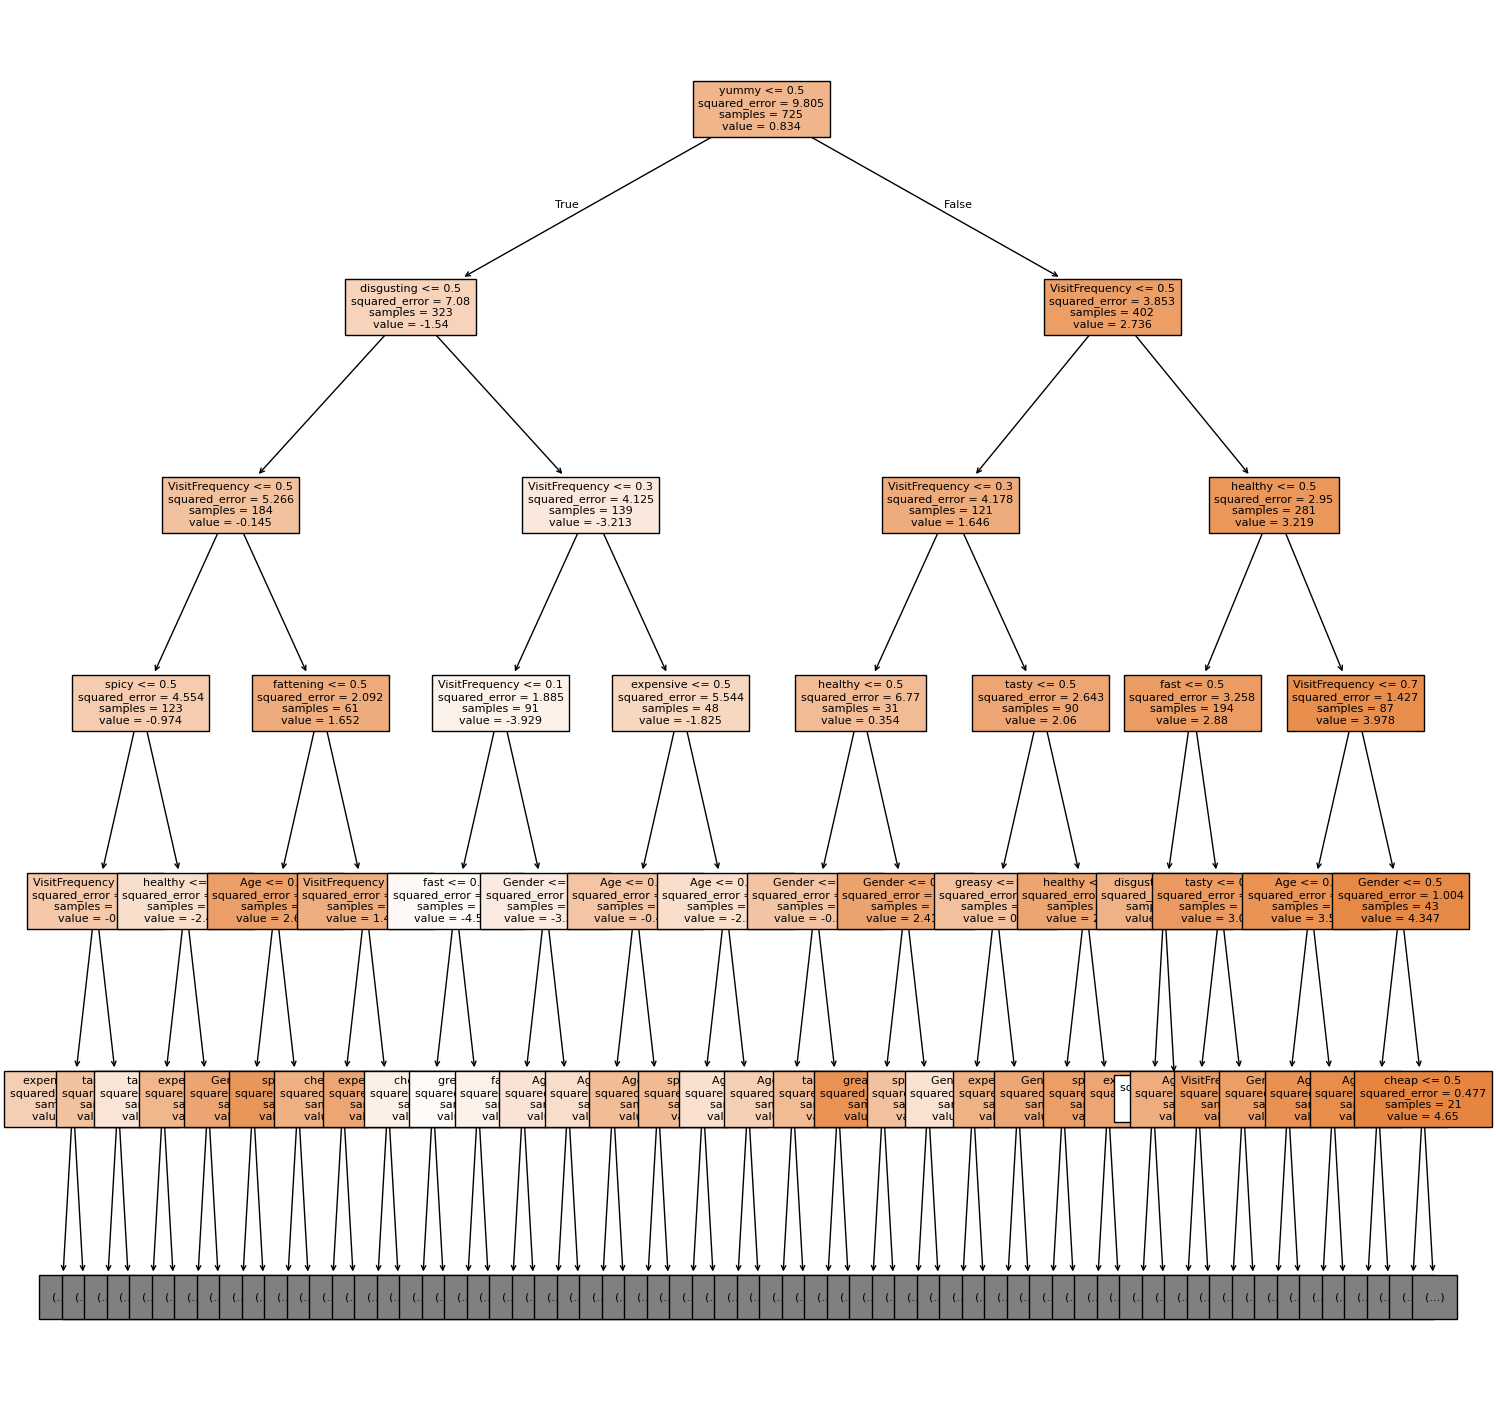

In [344]:
# Tree Visualization

from sklearn.tree import plot_tree

plt.figure(figsize=(18,18))
plot_tree(rf.estimators_[0],filled=True,fontsize=8,feature_names=X_train.columns,max_depth=5)
plt.show()

**KNeighborsRegressor**


In [345]:
# Model Train

knn.fit(X_train,y_train)

KNeighborsRegressor()

In [346]:
# Model Params

print("Model Params:")
print(knn.get_params())

Model Params:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


**DecisionTreeRegressor**

In [347]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [348]:
# Model Params

print("Model Params:")
print(dt.get_params())

Model Params:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


**Support Vector Regression**

In [349]:
svr.fit(X_train, y_train)

SVR()

In [350]:
# Model Params

print("Model Params:")
print(svr.get_params())

Model Params:
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


**Xgb Regressor**

In [351]:
# Model Training

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [352]:
# Model Params

print("Model Params:")
print(xgb.get_params())

Model Params:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


**Model Evaluation**

In [353]:
# Libraries

from sklearn.metrics import mean_squared_error, r2_score

Cross-Val Score on Entire Data:

It is to validate the test score given from model by cross checking entire x data with y data
While Training the model in multiple folds , performance metrics will be considered
This can be checked when the data size is huge

In [354]:
# Sklearn library

from sklearn.model_selection import cross_val_score

In [355]:
names = ['Multiple Linear Regression', 'Polynomial Regression', 'Lasso Regression',
         'Ridge Regression', 'Random Forest Regressor', 'Support Vector Regressor',
         'XGBoost Regressor', 'KNN Regressor', 'Decision Tree Regressor']

models = {'mlr': mlr, 'poly': poly, 'lasso': lasso, 'ridge': ridge, 'rf': rf,
          'svr': svr, 'xgb': xgb, 'knn': knn, 'dt': dt}

In [356]:
# Defining empty lists

trainRMSE = []
testRMSE = []

trainscore = []
testscore = []

fit = []

crossvalscore = []

In [357]:
# Loop through all models
for name, model in models.items():
    if name == 'poly':
        # Polynomial transformation
        pftrain = X_train
        pftest = X_test

        # RMSE and R2 Score
        trainRMSE.append(round(np.sqrt(mean_squared_error(y_train, model.predict(pftrain))), 2))
        testRMSE.append(round(np.sqrt(mean_squared_error(y_test, model.predict(pftest))), 2))
        trainscore.append(round(r2_score(y_train, model.predict(pftrain)), 2))
        testscore.append(round(r2_score(y_test, model.predict(pftest)), 2))
        trscore = r2_score(y_train, model.predict(pftrain))
        tescore = r2_score(y_test, model.predict(pftest))

        # Bias-Variance Trade-off
        if trscore >= 0.60 and tescore >= 0.60:
            if trscore > tescore:
                if trscore - tescore >= 0.10:
                    fit.append("Overfit")
                elif trscore - tescore < 0.10:
                    fit.append("Goodfit")
                else:
                    fit.append("Nofit")
            else:
                fit.append("Nofit")
        elif trscore < 0.60 and tescore < 0.60:
            if abs(trscore) == 0 and abs(tescore) == 0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-validation
        scores = cross_val_score(model, X, y, cv=3)
        crossvalscore.append(round(scores.mean(), 2))

    else:
        # RMSE and R2 Score
        trainRMSE.append(round(np.sqrt(mean_squared_error(y_train, model.predict(X_train))), 2))
        testRMSE.append(round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))), 2))
        trainscore.append(round(r2_score(y_train, model.predict(X_train)), 2))
        testscore.append(round(r2_score(y_test, model.predict(X_test)), 2))
        trscore = r2_score(y_train, model.predict(X_train))
        tescore = r2_score(y_test, model.predict(X_test))

        # Bias-Variance Trade-off
        if trscore >= 0.60 and tescore >= 0.60:
            if trscore > tescore:
                if trscore - tescore >= 0.10:
                    fit.append("Overfit")
                elif trscore - tescore < 0.10:
                    fit.append("Goodfit")
                else:
                    fit.append("Nofit")
            else:
                fit.append("Nofit")
        elif trscore < 0.60 and tescore < 0.60:
            if abs(trscore) == 0 and abs(tescore) == 0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")
        else:
            fit.append("Nofit")

        # Cross-validation
        scores = cross_val_score(model, X, y, cv=3)
        crossvalscore.append(round(scores.mean(), 2))

# Print results
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)
print("Train R2 Score:", trainscore)
print("Test R2 Score:", testscore)
print("Fit Status:", fit)
print("Cross-Validation Scores:", crossvalscore)


Train RMSE: [np.float64(1.7), np.float64(1.7), np.float64(3.07), np.float64(1.7), np.float64(0.87), np.float64(1.61), np.float64(0.8), np.float64(1.56), np.float64(0.64)]
Test RMSE: [np.float64(1.64), np.float64(1.64), np.float64(3.3), np.float64(1.65), np.float64(1.77), np.float64(1.68), np.float64(1.87), np.float64(1.8), np.float64(2.5)]
Train R2 Score: [0.69, 0.69, 0.0, 0.69, 0.92, 0.73, 0.93, 0.74, 0.96]
Test R2 Score: [0.75, 0.75, -0.02, 0.75, 0.71, 0.74, 0.68, 0.7, 0.42]
Fit Status: ['Nofit', 'Nofit', 'Underfit', 'Nofit', 'Overfit', 'Nofit', 'Overfit', 'Goodfit', 'Nofit']
Cross-Validation Scores: [np.float64(0.7), np.float64(0.7), np.float64(-0.0), np.float64(0.7), np.float64(0.64), np.float64(0.69), np.float64(0.61), np.float64(0.62), np.float64(0.43)]


In [358]:
# Display Options for Output

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [359]:
# Complete Model Evaluation Report

display(pd.DataFrame({'Model':names, 'Trainedmodel':models.values(), 'TrainRMSE':trainRMSE, 'TestRMSE':testRMSE,
             'Trainscore':trainscore, 'Testscore':testscore, 'Crossvalscore':crossvalscore, 'Fit':fit}))

,Model,Trainedmodel,TrainRMSE,TestRMSE,Trainscore,Testscore,Crossvalscore,Fit
0,Multiple Linear Regression,LinearRegression(),1.700,1.640,0.690,0.750,0.700,Nofit
1,Polynomial Regression,LinearRegression(),1.700,1.640,0.690,0.750,0.700,Nofit
2,Lasso Regression,Lasso(alpha=5),3.070,3.300,0.000,-0.020,-0.000,Underfit
3,Ridge Regression,Ridge(alpha=5),1.700,1.650,0.690,0.750,0.700,Nofit
4,Random Forest Regressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.870,1.770,0.920,0.710,0.640,Overfit
5,Support Vector Regressor,SVR(),1.610,1.680,0.730,0.740,0.690,Nofit
6,XGBoost Regressor,"XGBRegressor(base_score=None, booster=None, ca...",0.800,1.870,0.930,0.680,0.610,Overfit
7,KNN Regressor,KNeighborsRegressor(),1.560,1.800,0.740,0.700,0.620,Goodfit
8,Decision Tree Regressor,DecisionTreeRegressor(),0.640,2.500,0.960,0.420,0.430,Nofit


Better Perfomance Model

From the above table we can see that XGBoost Regressor  Giving better test score (0.71) and less test loss (1.77)  and Random Forest Regressor		Giving better test score (0.68) and less test loss (1.87) compared to other

In [363]:
# Parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Set up GridSearchCV for RandomForestRegressor
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search_rf.best_estimator_

# Initialize lists for metrics
trainRMSE = []
testRMSE = []
trainscore = []
testscore = []
fit = []
crossvalscore = []

# Calculate metrics for the best RandomForestRegressor model
train_rmse = round(np.sqrt(mean_squared_error(y_train, best_rf.predict(X_train))), 2)
test_rmse = round(np.sqrt(mean_squared_error(y_test, best_rf.predict(X_test))), 2)
train_r2 = round(r2_score(y_train, best_rf.predict(X_train)), 2)
test_r2 = round(r2_score(y_test, best_rf.predict(X_test)), 2)

# Append metrics
trainRMSE.append(train_rmse)
testRMSE.append(test_rmse)
trainscore.append(train_r2)
testscore.append(test_r2)

# Evaluate bias-variance trade-off
if train_r2 >= 0.60 and test_r2 >= 0.60:
    if train_r2 - test_r2 >= 0.10:
        fit.append("Overfit")
    elif train_r2 - test_r2 < 0.10:
        fit.append("Goodfit")
    else:
        fit.append("Nofit")
elif train_r2 < 0.60 and test_r2 < 0.60:
    fit.append("Underfit")
else:
    fit.append("Nofit")

# Cross-validation score
scores = cross_val_score(best_rf, X, y, cv=3, scoring='r2')
crossvalscore.append(round(scores.mean(), 2))

# Print results
print("Best Parameters:", grid_search_rf.best_params_)
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)
print("Train R2 Score:", trainscore)
print("Test R2 Score:", testscore)
print("Fit Status:", fit)
print("Cross-Validation Scores:", crossvalscore)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Train RMSE: [np.float64(1.42)]
Test RMSE: [np.float64(1.66)]
Train R2 Score: [0.79]
Test R2 Score: [0.74]
Fit Status: ['Goodfit']
Cross-Validation Scores: [np.float64(0.68)]


In [362]:
from sklearn.model_selection import GridSearchCV
# Parameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [50,100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV for XGBRegressor
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search_xgb.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Initialize lists for metrics
trainRMSE = []
testRMSE = []
trainscore = []
testscore = []
fit = []
crossvalscore = []

# Calculate metrics for the best XGBRegressor model
train_rmse = round(np.sqrt(mean_squared_error(y_train, best_xgb.predict(X_train))), 2)
test_rmse = round(np.sqrt(mean_squared_error(y_test, best_xgb.predict(X_test))), 2)
train_r2 = round(r2_score(y_train, best_xgb.predict(X_train)), 2)
test_r2 = round(r2_score(y_test, best_xgb.predict(X_test)), 2)

# Append metrics
trainRMSE.append(train_rmse)
testRMSE.append(test_rmse)
trainscore.append(train_r2)
testscore.append(test_r2)

# Evaluate bias-variance trade-off
if train_r2 >= 0.60 and test_r2 >= 0.60:
    if train_r2 - test_r2 >= 0.10:
        fit.append("Overfit")
    elif train_r2 - test_r2 < 0.10:
        fit.append("Goodfit")
    else:
        fit.append("Nofit")
elif train_r2 < 0.60 and test_r2 < 0.60:
    fit.append("Underfit")
else:
    fit.append("Nofit")

# Cross-validation score
scores = cross_val_score(best_xgb, X, y, cv=3, scoring='r2')
crossvalscore.append(round(scores.mean(), 2))

# Print results
print("Best Parameters:", grid_search_xgb.best_params_)
print("Train RMSE:", trainRMSE)
print("Test RMSE:", testRMSE)
print("Train R2 Score:", trainscore)
print("Test R2 Score:", testscore)
print("Fit Status:", fit)
print("Cross-Validation Scores:", crossvalscore)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Train RMSE: [np.float64(1.58)]
Test RMSE: [np.float64(1.62)]
Train R2 Score: [0.74]
Test R2 Score: [0.76]
Fit Status: ['Goodfit']
Cross-Validation Scores: [np.float64(0.7)]
